# IAM 961 HW2: QR decomp

#### Pratik Aghor

Due Monday Oct 14, 2019.

## Problem 1.
Write the following Julia functions for computing the QR decomposition of a matrix
  + `qrcgs(A)` via Classical Gram-Schmidt orthogonalization,
  + `qrmgs(A)` via Modified Gram-Schmidt orthogonalization, and
  + `qrhouse(A)` via Householder triangularization.
  
Each function should return the two matrices Q and R.

In [5]:
using LinearAlgebra
using Plots

In [6]:
function qrcgs(A)
    (m, n) = size(A) # size of A
    Q = zeros(m, n); R = zeros(n, n); v = zeros(m) # initialize Q, R, v
    for j = 1:n
        v = A[:, j]
        for i = 1:j-1
            R[i, j] = (Q[:, i])'*A[:, j]
            v  = v - R[i, j].*Q[:, i]
        end
        R[j, j] = norm(v, 2)
        Q[:, j] = v/R[j, j]    
    end
    return Q, R
end

function qrmgs(A)
    (m, n) = size(A)	# size of A
    Q = zeros(m, n); R = zeros(n, n); v = zeros(m) # initialize Q, R, v
    for j = 1:n
        v = A[:, j]
        for i = 1:j-1
            R[i, j] = (Q[:, i])'*v[:]	# this is the only change
            v  = v - R[i, j].*Q[:, i]
        end
        R[j, j] = norm(v, 2)
        Q[:, j] = v/R[j, j]    
    end
    return Q, R
end

function qrhouse(A)
    (m, n) = size(A)	# size of A

    # needs LinearAlgebra - start with Q = I ... mxn
    #Q = Matrix{Float64}(I, m, m)
    QDagger = Matrix{Float64}(I, m, m)
    R = deepcopy(A) # creates R as an independent object

    for k = 1:n
        e1 = zeros(m - k + 1)          # declare e1
        e1[1] = 1.0                    # define e1 = 1st vector in the canonical basis
        Q_k = Matrix{Float64}(I, m, m) # for every k, start anew with an mxm id matrix 

        x = R[k:m, k]

        if sign(x[1] != 0)
            v_k = (sign(x[1])*norm(x, 2)).*e1 + x 
        else
            v_k = norm(x, 2).*e1 + x
        end

        v_k = v_k/norm(v_k, 2)

        R[k:m, k:n] = R[k:m, k:n] - 2.0.* v_k *((v_k' * R[k:m, k:n]))

        Q_k[k:m , k:m] = I - (2.0/ (v_k'*v_k)) .* (v_k*v_k') # julia understands I = m-k+1 x m-k+1 identity matrix
        QDagger = Q_k * QDagger 
    end

    Q = QDagger'
    
    return Q, R
end 

qrhouse (generic function with 1 method)

## Problem 2.
Test that your QR algorithms work correctly on a fairly small and well-conditioned matrix (e.g. a 5 x 5 matrix with normally distributed elements, `A = randn(5,5)`).  You should test that $Q$ is unitary and that $QR \approx A$. Verify to your own satisfaction that $R$ is upper-triangular. Make these tests as compact and readable as you can!

In [7]:
m = 5; n = 4;
A = randn(m,n)

Qc, Rc = qrcgs(A)
Qm, Rm = qrmgs(A)
Qh, Rh = qrhouse(A)

print("\n Qc'*Qc = \n", Qc'*Qc, "\n")
print("\n Rc = \n", Rc, "\n")
print("\n Qc*Rc - A = \n", Qc*Rc - A, "\n")

print("\n Qm'*Qm = \n", Qm'*Qm, "\n")
print("\n Rm = \n", Rm, "\n")
print("\n Qm*Rm - A = \n", Qm*Rm - A, "\n")

print("\n Qh'*Qh = \n", Qh'*Qh, "\n")
print("\n Rh = \n", Rh, "\n")
print("\n Qh*Rh - A = \n", Qh*Rh - A, "\n")

print("\n Checking norms - \n")
@show norm(Qc'*Qc - I, 2)
@show norm(Qm'*Qm - I, 2)
@show norm(Qh'*Qh - I, 2)

@show norm(Qc*Rc - A, 2)
@show norm(Qm*Rm - A, 2)
@show norm(Qh*Rh - A, 2)



 Qc'*Qc = 
[1.0 5.55112e-17 5.55112e-17 1.66533e-16; 5.55112e-17 1.0 -2.77556e-17 4.83988e-16; 5.55112e-17 -2.77556e-17 1.0 1.61329e-16; 1.66533e-16 4.83988e-16 1.61329e-16 1.0]

 Rc = 
[1.29303 0.0408373 1.27597 -0.77684; 0.0 1.23593 0.221802 -1.24061; 0.0 0.0 1.83885 -0.355849; 0.0 0.0 0.0 0.408998]

 Qc*Rc - A = 
[0.0 0.0 0.0 0.0; 1.11022e-16 0.0 -5.55112e-17 0.0; 0.0 0.0 0.0 -4.85723e-17; 0.0 -2.77556e-17 1.11022e-16 0.0; 0.0 0.0 2.22045e-16 0.0]

 Qm'*Qm = 
[1.0 5.55112e-17 5.55112e-17 8.67362e-17; 5.55112e-17 1.0 -2.77556e-17 -7.069e-17; 5.55112e-17 -2.77556e-17 1.0 -1.21431e-17; 8.67362e-17 -7.069e-17 -1.21431e-17 1.0]

 Rm = 
[1.29303 0.0408373 1.27597 -0.77684; 0.0 1.23593 0.221802 -1.24061; 0.0 0.0 1.83885 -0.355849; 0.0 0.0 0.0 0.408998]

 Qm*Rm - A = 
[0.0 0.0 0.0 0.0; 1.11022e-16 0.0 -5.55112e-17 0.0; 0.0 0.0 0.0 -4.85723e-17; 0.0 -2.77556e-17 1.11022e-16 0.0; 0.0 0.0 2.22045e-16 0.0]

 Qh'*Qh = 
[1.0 -1.38778e-17 -5.55112e-17 -2.77556e-17 0.0; -1.38778e-17 1.0 2.498e-16 

1.077278642367559e-15

## Problem 3. 
Write a `backsub(R,b)` function that returns the solution $x$ of the upper-triangular system $Rx=b$ by backsubstitution. You can assume that $R$ is square and nonsingular. Test your backsubstitution function by solving an $Ax=b$ problem with your 5 x 5 $A$ matrix, one of your QR algorithms, and a known solution $x$. 


In [8]:
function backsub(R, b)
    n = length(b)
    x = zeros(n)
    x[n] = b[n]/R[n, n]
    for i = n-1:-1:1
        sum = 0
        for j = i+1:n
            sum = sum + R[i, j]*x[j]
        end
        #@show i
        #@show sum
        x[i] = (b[i]-sum)/R[i, i]
    end
    return x
end

backsub (generic function with 1 method)

In [9]:
R1 = [1 2 1; 0 1 2; 0 0 3]
b1 = [1; 4; 3]
backsub(R1, b1)

3-element Array{Float64,1}:
 -4.0
  2.0
  1.0

## Problem 4. 
Write a function `A = randommatrix(m,n kappa)` function that returns an m x n
random matrix with condition number kappa and exponentially graded singular values
(i.e. $\sigma_1/\sigma_m = \kappa$ and $\sigma_{j+1}/\sigma_{j} = \text{const}$). 
You can use the Matlab code at the top of pg 65 in Trefethen and Bau as a starting 
point. Test that it works by constructing a 4 x 4 matrix with kappa=10^8 and then 
computing its condition number. 

In [10]:
function randommatrix(m,n, kappa)
    
    idx = log10(kappa)
    U, X = qr(randn(m, m));
    V, X = qr(randn(n, n));
    
    #s    = 10 .^range(0, stop = -idx, length = m )
    #Σ    = [Diagonal(s) zeros(m, n-m)]
    Σ = [Diagonal(10 .^range(0, stop = -idx, length = m)) zeros(m, n-m)]
    
    # @show Σ
    
    A = U*Σ*V
end

randommatrix (generic function with 1 method)

In [11]:
kappa = 10^-8
m = 4; n = 4;

A = randommatrix(m, n, kappa)
#@show A
cond(A)

# check if we indeed have the correct singular values
U,Σ,V = svd(A);
log10.(Σ)

4-element Array{Float64,1}:
  8.0                  
  5.333333333333336    
  2.6666666666633394   
 -5.221637958213129e-10

## Problem 5.
Solve a large number of random $Ax=b$ problems using your QR decompositions
and `randommatrix` and `backsubstitution` functions, and produce a scatter 
plot of the normalized solution error  $\|\hat{x}-x\|/\|x\|$ versus $\kappa$. 
Plot data points from CGS in blue, MGS in red, and Householder in green.

Specifically: Construct a random $A$ matrix with $\kappa = 10^n$ where $n$ is 
a random real-valued number uniformly distributed between 0 and 18. 
Select a random $x$ vector with `x = randn(m,1)`, and then set $b = Ax$. For each of
the CGS, MGS, and Householder QR algorithms, compute the numerical solution $\hat{x}$ 
of $Ax=b$ via QR and then plot $\|\hat{x}-x\|/\|x\|$ versus $\kappa$ using log-log axes
and the color scheme specified above.  Do this for a hundred or so random $Ax=b$ problems and 
for a fairly small value of $m$ (perhaps 10 or 20). 

In [12]:
-

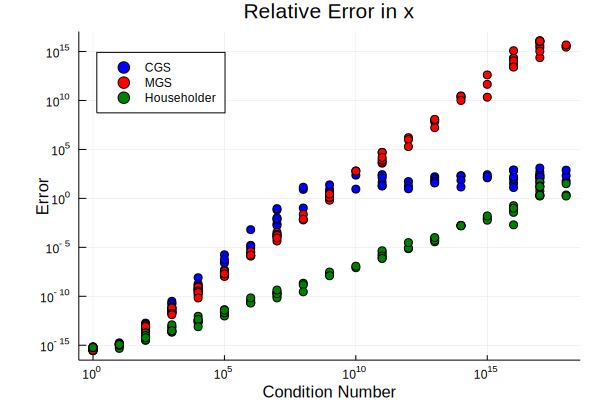

In [13]:
sp = scatter(kappa,cgs_norm,xaxis=:log,yaxis=:log,title = "Relative Error in x",xlabel="Condition Number",ylabel="Error",label="CGS", markercolor="blue", markersize=4)
scatter!(sp,kappa,mgs_norm,xaxis=:log,yaxis=:log,label="MGS",markercolor="red", markersize=4)
scatter!(sp,kappa,house_norm,xaxis=:log,yaxis=:log,label="Householder",markercolor="green",markersize=4)
scatter!(sp, legend=:topleft)

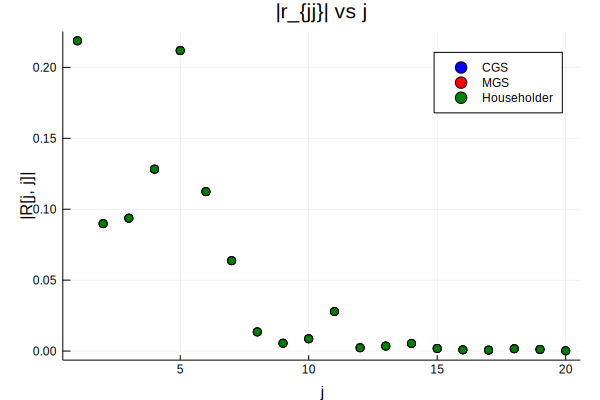

In [14]:
rc = abs.(diag(Rc))
rm = abs.(diag(Rm))
rh = abs.(diag(Rh))
sp = scatter(rc,title = "|r_{jj}| vs j",xlabel="j",ylabel="|R[j, j]|",label="CGS", markercolor="blue", markersize=4)
scatter!(sp,rm,label="MGS", markercolor="red", markersize=4)
scatter!(sp,rh,label="Householder", markercolor="green",markersize=4)
scatter!(sp, legend=:topright)

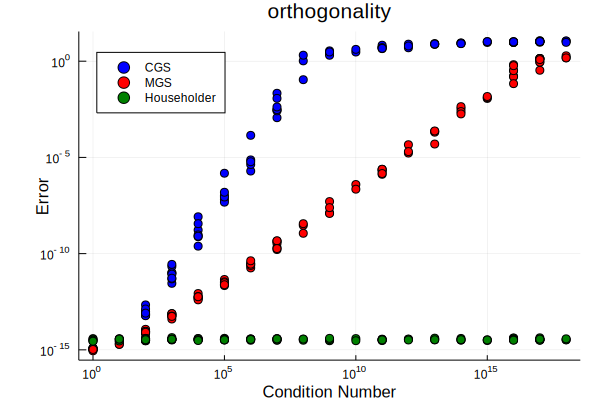

In [15]:
sp = scatter(kappa,orthogonality_cgs,xaxis=:log,yaxis=:log,title = "orthogonality",xlabel="Condition Number",ylabel="Error",label="CGS",markercolor="blue", markersize=4)
scatter!(sp,kappa,orthogonality_mgs,xaxis=:log,yaxis=:log,label="MGS",markercolor="red", markersize=4)
scatter!(sp,kappa,orthogonality_house,xaxis=:log,yaxis=:log,label="Householder",markercolor="green",markersize=4)
scatter!(sp, legend=:topleft)

In [16]:
# create an ill-conditioned matrix
#=
m = 4; n = 4; kappa = 10^12; 
A = randommatrix(m, n, kappa); 

cond(A)
=#

In [17]:
#=
Qc, Rc = qrcgs(A);
Qm, Rm = qrmgs(A);
Qh, Rh = qrhouse(A);
Q, R   = qr(A);
x = rand(m, 1);
b = A*x;
=#

In [18]:
#=
xHatc = backsub(Rc, Qc'*b)
xHatm = backsub(Rm, Qm'*b)
xHath = backsub(Rh, Qh'*b)

Oc = Qc'*Qc - I
Om = Qm'*Qm - I
Oh = Qh'*Qh - I

error_c = xHatc - x
error_m = xHatm - x
error_h = xHath - x
=#

In [19]:
# heatmap(Oc)

In [20]:
# heatmap(error_c)

In [21]:
# heatmap(Om)

In [22]:
# heatmap(error_m)

In [23]:
# heatmap(Oh)

In [24]:
# heatmap(error_h)

## Problem 6 
Comment on your results. What can you explain about the scatter plots 
based on the algorithms and their implementation in finite-precision arithmetic?
Or, contrariwise, what can you say about the algorithms based on the scatter 
plots? 

$\rightarrow$ Some points to note:
1. Householder is consistently better than CGS and MGS over finite precision
2. From the orthogonality vs. $\kappa$ plot, it is clear that between MGS and CGS, MGS consistently produces more orthogonal Q's in comparison to MGS.
3. What I don't understand is why the error for CGS saturates (perhaps something related to the machine precision), but the error in the solution for MGS blows up. 

## Problem 7
If you are curious, repeat problem 5 for a different value of $m$ 
(perhaps $m=100$). Does the dimensionality of the matrix (the value of $m$) 
make any difference?

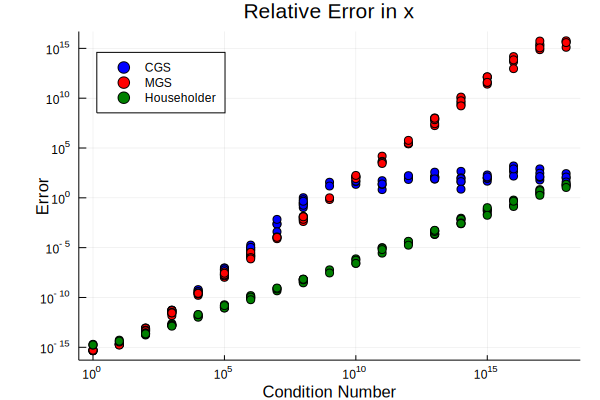

In [25]:
m = 100; n = 100;
a1 = 0; b1 = 18;
counter = 100
b = zeros(m); x = zeros(m);
cgs_norm = zeros(counter); mgs_norm = zeros(counter); house_norm = zeros(counter);
orthogonality_cgs = zeros(counter); orthogonality_mgs = zeros(counter); orthogonality_house = zeros(counter);
kappa = 10 .^(rand(a1:b1,counter,1));
for i = 1:counter
    
    # generate a random matrix with a given kappa
    A = randommatrix(m, n, kappa[i])
    
    # generate an apriorie known solution x 
    x = randn(m,1)
    
    # set b = Ax
    b = A*x
    
    # now, solve A * xHat = b using CGS, MGS, Householder, xHat should be close to x! 
    Qc, Rc = qrcgs(A)
    Qm, Rm = qrmgs(A)
    Qh, Rh = qrhouse(A)
    
    # solve R xHat = Q' * b via backsub
    xHatc = backsub(Rc, Qc' *b)
    xHatm = backsub(Rm, Qm' *b)
    xHath = backsub(Rh, Qh' *b)
    
    # get relative norms
    cgs_norm[i] = norm((xHatc - x), 2)/norm(x, 2)
    mgs_norm[i] = norm((xHatm - x), 2)/norm(x, 2)
    house_norm[i] = norm((xHath - x), 2)/norm(x, 2)
    
    orthogonality_cgs[i] = norm((Qc'*Qc - I), 2)
    orthogonality_mgs[i] = norm((Qm'*Qm - I), 2)
    orthogonality_house[i] = norm((Qh'*Qh - I), 2)
end

sp = scatter(kappa,cgs_norm,xaxis=:log,yaxis=:log,title = "Relative Error in x",xlabel="Condition Number",ylabel="Error",label="CGS", markercolor="blue", markersize=4)
scatter!(sp,kappa,mgs_norm,xaxis=:log,yaxis=:log,label="MGS",markercolor="red", markersize=4)
scatter!(sp,kappa,house_norm,xaxis=:log,yaxis=:log,label="Householder",markercolor="green",markersize=4)
scatter!(sp, legend=:topleft)

#### The size of the matrix did not make any major difference. The trends continued to be similar. 

## Problem 8 (optional)

The QR decompositon algorithms break down when the matrix $A$ is singular. Revise your CGS, MGS, and Householder QR algorithms to handle singular matrices gracefully. Show evised algorithms work well on singluar or nearly singular matrices.

Let's start with CGS. First, we do not know, apriorie, the rank of A. It can be full rank and yet badly conditioned. So getting the rank is not going to help us.  

However, what will help us is the idea that we can perform reduced QR decomposition if A is not full rank. 

At each step j, we want a unit vector $q_{j}$, s.t., $q_{j} \in <a_{1}, ..., a{j} >$ and $q_{j} \perp <q_{1}, ..., q_{j-1}>$, where $<\cdot>$ denotes span according to the notation in Trefethen and Bau.  

The idea is as follows: calculate $r_{jj}$ as before in CGS/MGS. If $r_{jj} <$ some pre-defined tolerance, we have a problem. Note the index of the column (in the idx array) for future reference, by making the entry zero from one. Proceed as if nothing has happened. 

Once all calculations are done, if the $idx[j] == 0$, completely disregard that column! Form $\hat{Q}$ and $\hat{R}$ this way.

After that, they will have bunch of zero columns and rows. To be precise, if $idx[j] == 0$, then the $j^{th}$ column and row of $\hat{Q}$ and $\hat{R}$ should have zeros. 

Now, swap the columns and rows to beautify $\hat{Q}$ and $\hat{R}$! 


In [26]:
function swapcols(A, i, j)
    m = size(A, 1)
    #Atemp = deepcopy(A);
    for k = 1:m
        A[k, i], A[k, j] = A[k, j], A[k, i]
    end
    return A
end

function swaprows(A, i, j)
    n = size(A, 2)
    for k = 1:n
        A[i, k], A[j, k] = A[j, k], A[i, k]
    end
    return A
end

swaprows (generic function with 1 method)

In [27]:
# create a rank deficient matrix
M = [1 2 3 4 ; 2 5 6 7 ; 3 1 9 12 ; 4 5 12 15]

4×4 Array{Int64,2}:
 1  2   3   4
 2  5   6   7
 3  1   9  12
 4  5  12  15

In [28]:
#check swapcols function
Mtemp = swapcols(M, 3, 4)
Mtemp

4×4 Array{Int64,2}:
 1  2   4   3
 2  5   7   6
 3  1  12   9
 4  5  15  12

In [29]:
function qrcgsr(A, tolerance)
    (m, n) = size(A) # size of A
    #Atemp = deepcopy(A)
    Q = zeros(m, n); R = zeros(n, n); v = zeros(m) # initialize Q, R, v
    QHat = zeros(m, n); RHat = zeros(n, n);
    
    idx = ones(n) # index, 0 means problem
    #@show idx
    for j = 1:n
        v = A[:, j]
        
        for i = 1:j-1
            R[i, j] = (Q[:, i])'*A[:, j]
            v  = v - R[i, j].*Q[:, i]
        end
        
        R[j, j] = norm(v, 2) 
        
        #@show j
        if j < n && abs(R[j, j]) < tolerance
            idx[j] = 0.0
            Q[:, j] = zeros(m, 1)
        else
            Q[:, j] = v/R[j, j]
        end
        #@show abs(R[j, j])
        #@show R
    end
    
    # form QHat and RHat
    for j=1:n
        if(idx[j] == 1)
            QHat[:, j] = Q[:, j]
            RHat[:, j] = R[:, j]
        end
    end
      
    # swap cols and rows for proper looks    
    for j=1:n
        if(idx[j]==0)
            @show j 
            next_idx_one = findfirst(x->x==1, idx[j+1:n])
            @show next_idx_one
            QHat = swapcols(QHat, j, j + next_idx_one)
            QHat = swaprows(QHat, j, j + next_idx_one)
            
            RHat = swapcols(RHat, j, j + next_idx_one)
            RHat = swaprows(RHat, j, j + next_idx_one)
            
        end
    end
    #@show idx
    return QHat, RHat
end

qrcgsr (generic function with 1 method)

In [30]:
# create a rank deficient matrix
A = [1 2 3 4 ; 2 4 6 7 ; 3 6 9 12 ; 4 8 12 15]

4×4 Array{Int64,2}:
 1  2   3   4
 2  4   6   7
 3  6   9  12
 4  8  12  15

In [31]:
Q, R = qrcgsr(A, 1e-5)

j = 2
next_idx_one = 2
j = 3
next_idx_one = 1


([0.182574 0.223607 0.0 0.0; 0.730297 -0.223607 0.0 0.0; 0.365148 -0.67082 0.0 0.0; 0.547723 0.67082 0.0 0.0], [5.47723 20.8135 0.0 0.0; 0.0 0.894427 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0])

In [32]:
R

4×4 Array{Float64,2}:
 5.47723  20.8135    0.0  0.0
 0.0       0.894427  0.0  0.0
 0.0       0.0       0.0  0.0
 0.0       0.0       0.0  0.0

In [33]:
Q

4×4 Array{Float64,2}:
 0.182574   0.223607  0.0  0.0
 0.730297  -0.223607  0.0  0.0
 0.365148  -0.67082   0.0  0.0
 0.547723   0.67082   0.0  0.0

#### similarly, I revised qrmgs to qrmgsr

In [34]:
function qrmgsr(A, tolerance)
    (m, n) = size(A) # size of A
    #Atemp = deepcopy(A)
    Q = zeros(m, n); R = zeros(n, n); v = zeros(m) # initialize Q, R, v
    QHat = zeros(m, n); RHat = zeros(n, n);
    
    idx = ones(n) # index, 0 means problem
    #@show idx
    for j = 1:n
        v = A[:, j]
        
        for i = 1:j-1
            R[i, j] = (Q[:, i])'*v # this is the only change
            v  = v - R[i, j].*Q[:, i]
        end
        
        R[j, j] = norm(v, 2) 
        
        #@show j
        if j < n && abs(R[j, j]) < tolerance
            idx[j] = 0.0
            Q[:, j] = zeros(m, 1)
        else
            Q[:, j] = v/R[j, j]
        end
        #@show abs(R[j, j])
        #@show R
    end
    
    # form QHat and RHat
    for j=1:n
        if(idx[j] == 1)
            QHat[:, j] = Q[:, j]
            RHat[:, j] = R[:, j]
        end
    end
      
    # swap cols and rows for proper looks    
    for j=1:n
        if(idx[j]==0)
            @show j 
            next_idx_one = findfirst(x->x==1, idx[j+1:n])
            @show next_idx_one
            QHat = swapcols(QHat, j, j + next_idx_one)
            QHat = swaprows(QHat, j, j + next_idx_one)
            
            RHat = swapcols(RHat, j, j + next_idx_one)
            RHat = swaprows(RHat, j, j + next_idx_one)
            
        end
    end
    #@show idx
    return QHat, RHat
end

qrmgsr (generic function with 1 method)

#### For Householder, we need to apply a different strategy

The idea is as follows:

1. Start with A
2. Find the column with max norm 
3. Swap that column with the first column - call it $A_{1}$, for now
4. Apply Householder transformation on that column
5. For the second one - find the max norm in the new matrix $Q_{1}A_{1}$ between [2:m, 2:n].
6. Swap that vector with the second one in $A_{1}$, call the new matrix $A_{2}$.
7. Apply Householder on the second column of A_{2} from [2:m]
and so on.
8. Did not have time to implement it, but will do in future. 

## Problem 9 (optional)

As shown in the lecture demo, the breakdown of CGS and MGS algorithms as $A$ becomes singular is a loss of orthogonality in the matrix $Q$. Can you think of any way to revise CGS or MGS to improve the orthogonality of $Q$, perhaps by rerunning CGS or MGS on the not-quite-orthogonal $Q$ matrix from a first pass of the algorithm? Or by recalculating each $q_j$ from the first-pass approximate $q_j$ in each pass of the ``for j = 1 to m`` loop? Does any such method work? Why or why not?

#### Ans.

I have not done explicit numerical experiments, but I think such method will not work. The chief reason for my guess lies in the accumulation of errors. In the first pass, the errors have already been made. Any further attempt might worsen the approximations. However, I must stress that this is my intuition. I could be wrong and explicit numerical experiments should guide towards the actual answer.  